## XMAC02 - Prova Prática 1
Nome: 

Nro Matric:

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson, norm

Para as questões de 1 a 4 você usará o dataset 'sales', o qual contém informações sobre as vendas de miniaturas colecionáveis para lojas de diferentes países.

In [94]:
df = pd.read_csv("sales.csv")
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,PRICETOTAL,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,CUSTOMERNAME,CITY,STATE,COUNTRY,DEALSIZE
0,10107,30,95.70,2871.00,1,2,2003,Motorcycles,Land of Toys Inc.,NYC,NY,USA,Small
1,10121,34,81.35,2765.90,2,5,2003,Motorcycles,Reims Collectables,Reims,NaN,France,Small
2,10134,41,94.74,3884.34,3,7,2003,Motorcycles,Lyon Souveniers,Paris,NaN,France,Medium
3,10145,45,83.26,3746.70,3,8,2003,Motorcycles,Toys4GrownUps.com,Pasadena,CA,USA,Medium
4,10159,49,100.00,4900.00,4,10,2003,Motorcycles,Corporate Gift Ideas Co.,San Francisco,CA,USA,Medium


In [95]:
df2 = df[(df['COUNTRY'] == 'France') & (df['PRODUCTLINE'] == 'Classic Cars')]
df2.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,PRICETOTAL,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,CUSTOMERNAME,CITY,STATE,COUNTRY,DEALSIZE
34,10194,42,100.00,4200.00,4,11,2003,Classic Cars,"Saveley & Henriot, Co.",Lyon,NaN,France,Large
43,10304,47,100.00,4700.00,4,10,2004,Classic Cars,Auto Assoc. & Cie.,Versailles,NaN,France,Large
112,10178,24,100.00,2400.00,4,11,2003,Classic Cars,Alpha Cognac,Toulouse,NaN,France,Medium
127,10359,48,54.68,2624.64,4,12,2004,Classic Cars,Reims Collectables,Reims,NaN,France,Small
130,10395,32,100.00,3200.00,1,3,2005,Classic Cars,Lyon Souveniers,Paris,NaN,France,Medium


### Questão 01 [valor: 1,0]
Obtenha a média, a mediana e o desvio padrão do preço unitário (PRICEEACH) da linha de produtos (PRODUCTLINE) chamada 'Classic Cars', vendidos para lojas francesas (COUNTRY == 'France').

In [96]:
df2 = df[(df['COUNTRY'] == 'France') & (df['PRODUCTLINE'] == 'Classic Cars')]

In [97]:
df2['PRICEEACH'].mean()

85.09908163265305

In [98]:
df2['PRICEEACH'].median()

100.0

In [99]:
df2['PRICEEACH'].std()

20.608175741567454

### Questão 2 [valor: 1,0]
Plote dois boxplots lado a lado comparando o preço unitário (PRICEEACH) das linhas de produto (PRODUCTLINE) 'Planes' e 'Trains' vendidos nos USA (COUNTRY == 'USA').

In [100]:
df3 = df[df['COUNTRY'] == 'USA']
df3 = df3[df3['PRODUCTLINE'].isin(["Planes", "Trains"])]


<Axes: title={'center': 'PRICEEACH'}, xlabel='PRODUCTLINE'>

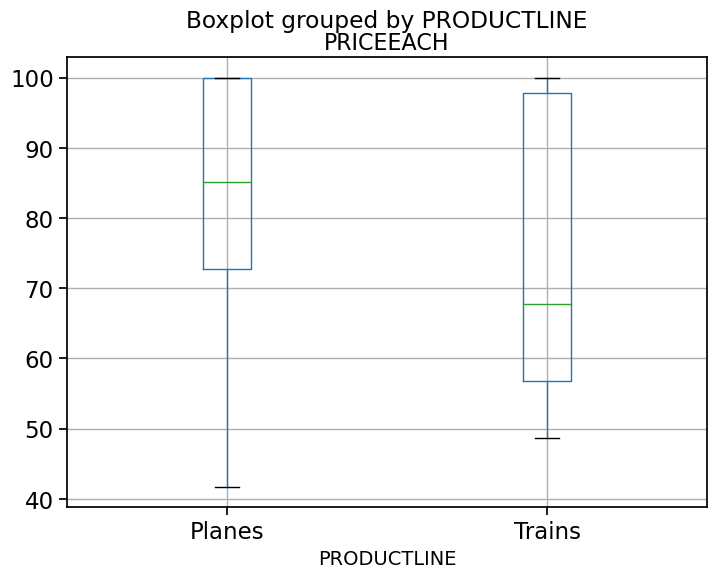

In [101]:
df3.boxplot(by="PRODUCTLINE", column =['PRICEEACH'])

In [102]:
#pd.crosstab(df['COUNTRY'], columns=df['PRODUCTLINE'])

### Questão 3 [valor: 1,5]
Elabore um gráfico de barras que mostre o total em vendas para cada país a cada ano.

In [103]:
df4 = pd.crosstab(df['COUNTRY'], columns=df['YEAR_ID'], values=df['PRICETOTAL'], aggfunc=np.sum)
df4

YEAR_ID,2003,2004,2005
COUNTRY,,,
Australia,209027.30,191590.75,120980.41
Austria,73774.22,44204.23,54814.60
Belgium,3348.46,71068.47,20111.95
Canada,43498.53,123743.04,26262.77
Denmark,79387.38,95960.25,17400.00
Finland,92044.87,65888.51,110781.32
France,252654.51,460819.18,205784.16
Germany,56814.10,121874.98,NaN
Ireland,NaN,43237.24,NaN


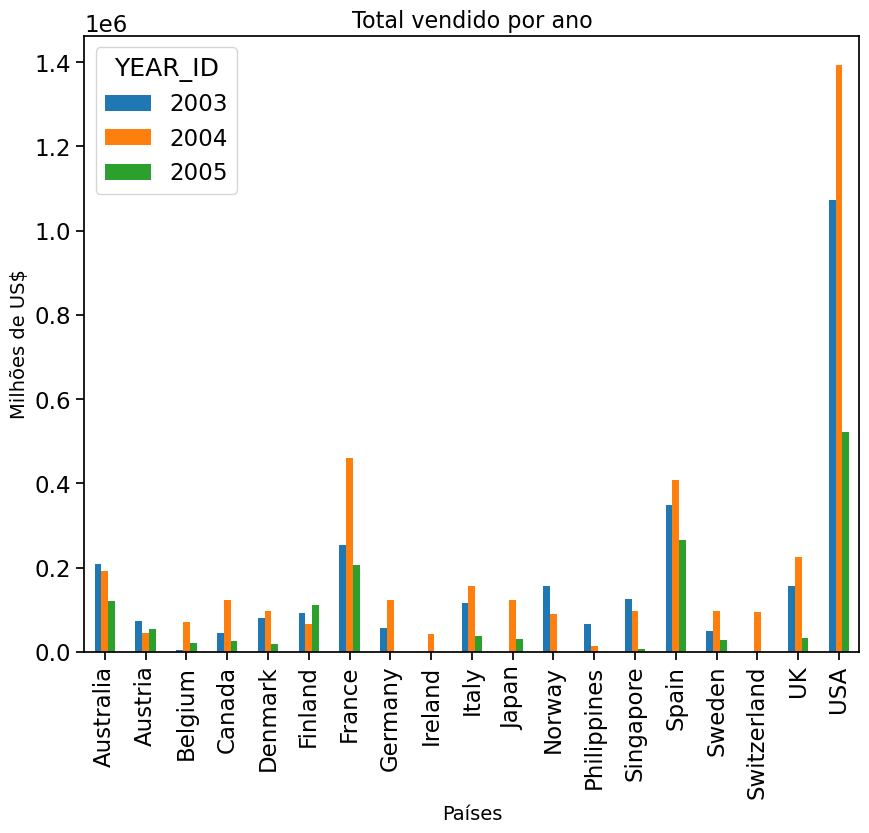

In [104]:
plt.rcParams["figure.figsize"] = [10,8]
sns.set_context("notebook", font_scale=1.5, rc={"font.size":14,"axes.titlesize":16,"axes.labelsize":12})
df4.plot(kind="bar",stacked=False)
plt.title("Total vendido por ano")
plt.ylabel("Milhões de US$")
plt.xlabel("Países")
plt.show()

### Questão 4 [valor: 1,5]
Elabore um gráfico de pizza que mostre a distribuição das vendas para os Estados Unidos nos 4 trimestres de 2004.

In [105]:
df5 = df[(df['COUNTRY'] == 'USA') & (df['YEAR_ID'] == 2004)]

df6 = df5.groupby("QTR_ID").agg({"PRICETOTAL": "sum"})

df6

,PRICETOTAL
QTR_ID,
1,212233.77
2,251455.87
3,332584.31
4,596828.22


In [106]:
sizes = df6['PRICETOTAL']
labels = ['1st QTR', '2nd QTR', '3rd QTR', '4th QTR']

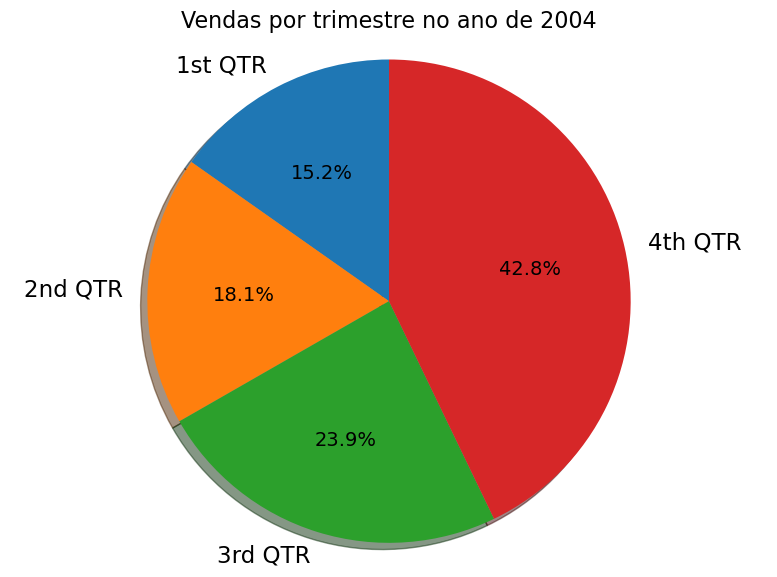

In [107]:
plt.rcParams["figure.figsize"] = [8,6]
plt.pie(sizes, labels = labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Vendas por trimestre no ano de 2004')
plt.tight_layout()
plt.axis('equal')
plt.show()

### Questão 5 [valor: 1,0]
Um restaurante serve 150 refeições todas as noites. Os garçons servem 6 pratos errados por noite, ou seja 4% dos pedidos resultam em falha (6/150 = 0.04). Qual é a probabilidade de que uma dada noite tenha uma taxa de sucesso de 99%?

Para termos uma taxa de sucesso de 99%, deve haver apenas 1,5 erros, o que equivale a 1%. Mas como estamos trabalhando com uma distribuição discreta, vamos arredondar para 2 erros. Portanto, estamos trabalhando com 148 acertos em 150. Queremos também calcular a probabilidade cumulativa, pois são pelo menos 148 ordens corretas. Portanto, o cálculo precisa ser P(148) + P(149) + P(150). A solução direta é pela função sf, mas podemos fazer também 1 - cdf.

In [108]:
round(binom.sf(147, 150, 0.96), 4)

0.0584

In [109]:
round(1 - round(binom.cdf(147, 150, 0.96), 4), 4)

0.0584

### Questão 6 [valor: 1,0]
Nos últimos 100 anos, ocorreram 93 terremotos de intensidade 6,0 ou mais na escala Richter. Qual é a probabilidade de ocorrerem 3 terremotos no mesmo ano e todos de intensidade 6,0 ou mais?

In [110]:
round(poisson.pmf(3, 0.93), 4)

0.0529

### Questão 7 [valor: 1,5]
O tempo médio que uma pessoa passa em um certo museu é de 96 minutos. O desvio padrão é de 17 minutos. Suponha que o tempo médio de uma visita seja uma variável normalmente distribuída.

A) Se um visitante for selecionado aleatoriamente, encontre a probabilidade de ele passar pelo menos 120 minutos no museu.

B) Se um visitante for selecionado aleatoriamente, encontre a probabilidade de ele passar no máximo 80 minutos no museu.

C) Após deixar um grupo de turistas, quanto tempo depois o ônibus deve retornar para buscá-los de forma a permitir que o tempo de visita atenda as necessidades dos turistas. Explique seu raciocínio.

In [111]:
#A
norm.sf(120, 96, 17)

0.07900962692369945

In [112]:
#B
norm.cdf(80, 96, 17)

0.1733072162515253

C \
Se acrescentarmos 3 desvios padrão ao tempo médio, atenderemos a necessidade de 99,85% dos turistas. Assim: 96 + 3*17 = 147 minutos é um tempo adequado.

### Questão 8 [valor: 1,5]
A maioria das pessoas pensa que a temperatura corporal normal é 37∘C. Em 1992, o Journal of the American Medical Association afirmou que um número mais preciso é 36,78∘C, e que as temperaturas corporais têm um desvio padrão de 0,39∘C. Supondo que isso seja verdade e que as temperaturas corporais sigam uma distribuição normal, responda o seguinte:

A) Em que intervalo caem os “90% médios” da temperatura corporal?

B) Qual porcentagem de pessoas seria esperada com temperatura corporal acima de 37∘C?

C) Abaixo de que temperatura corporal estão os 20% mais frios de todas as pessoas?

In [113]:
#A
print(norm.ppf(0.1, 36.78, 0.39))
print(norm.ppf(0.9, 36.78, 0.39))

36.28019488943761
37.27980511056239


In [114]:
#B
norm.sf(37, 36.78, 0.39) * 100

28.6342166569991

In [115]:
#C
print(norm.ppf(0.2, 36.78, 0.39))

36.45176771890657
